<a href="https://colab.research.google.com/github/RosaCastillo10/-ACTIVITIES-/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Final Project - CT Scan Images of Lung Cancer Patients**

---



1996381 - Rosa Nelly Castillo Villa

2055305 - Erick Alejandro Cuellar Sanchez

2062247 - Leyda Veronica Sifuentes Pinal

2049054 - Hanna Valeria Salinas Garcia

2003500 - Diego Eduardo Elizondo Robledo

Class: Artificial Intelligence // Group:003 // LMV N1

Ing. Daniel Isaías López Páez


---

## Abstract

---



Early detection of lung cancer significantly increases patient survival rates, yet traditional diagnostic methods often require expert interpretation and are prone to variability. In this project, we develop a Convolutional Neural Network (CNN) capable of distinguishing lung cancer CT scan images using a publicly available dataset from Kaggle. The objective is to design and train an automated classification model that supports clinical decision making by identifying patterns associated with malignant and non malignant conditions. The methodology includes dataset preprocessing, data augmentation, and transfer learning with a state of the art CNN architecture. Experimental results demonstrate competitive classification accuracy, validating the effectiveness of deep learning techniques for medical image analysis.


## Introduction

---



Lung cancer remains one of the leading causes of cancer related deaths worldwide, largely due to late diagnosis and the rapid progression of malignant tumors. Computed Tomography (CT) scans are among the most effective non invasive imaging techniques for detecting lung abnormalities; however, interpreting these images requires specialized radiological expertise and can be subject to human error. Recent advances in artificial intelligence particularly deep learning have enabled automated image analysis systems that can support clinicians by providing fast and accurate assessments.

Convolutional Neural Networks (CNNs) are widely used for medical image classification due to their ability to extract hierarchical features directly from raw images. Their performance often surpasses traditional machine learning approaches that rely on handcrafted features. In this project, we apply CNN based classification to a dataset of CT scans of lung cancer patients, aiming to automate the process of distinguishing between cancerous and non cancerous images.

Using data augmentation and transfer learning, our approach seeks to overcome challenges such as dataset imbalance, limited data availability, and noise inherent in medical imaging. This project contributes a reproducible deep learning workflow that can serve as the foundation for future clinical AI tools and research in cancer detection.

## Methodology

---


## 1. Import libraries

The first part consists of importing libraries.



*   For building and training deep learning models, especially CNNs



In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models



*   For plotting graphs and visualizing model metrics or predictions



In [16]:
import matplotlib.pyplot as plt



*   For downloading datasets directly from Kaggle into the workspace



In [17]:
import kagglehub



*   For handling image processing tasks such as resizing or color format conversions



In [18]:
import cv2



*   For managing file paths and retrieving images from directories



In [19]:
import os
import glob



*   For numerical computations and working with image matrices



In [20]:
import numpy as np



*   For splitting the dataset into training and testing sets





In [21]:
from sklearn.model_selection import train_test_split



*   For generate random numbers


In [22]:
import random

Kera Utilities

---



These utilities allow you to:

*   Convert class labels into one-hot encoded vectors.

*   Perform data augmentation to increase dataset size and diversity.

*   Build sequential convolutional neural network models.




In [23]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## 2. Load Data

---
The dataset employed in this project consists of chest CT scan images, obtained directly from Kaggle using the following command:


```
# kagglehub.dataset_download()
```
This function streamlines the process of accessing the dataset by automatically downloading and unpacking the necessary files into a working directory.





In [24]:
path = kagglehub.dataset_download("mdnafeesimtiaz/ct-scan-images-of-lung-cancer")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ct-scan-images-of-lung-cancer' dataset.
Path to dataset files: /kaggle/input/ct-scan-images-of-lung-cancer


## 3. Preprocessing

---

The preprocessing stage is essential to prepare the medical CT scan images before feeding them into the convolutional neural network. Since the dataset contains images from multiple classes with different resolutions, aspect ratios, and visual conditions, preprocessing ensures consistency and improves the model’s ability to learn meaningful patterns. Each image is first loaded from the corresponding folder associated with its diagnostic category. The images are then converted from BGR to RGB format to maintain compatibility with common deep-learning frameworks. After loading, all images are resized to a fixed resolution of 224×224 pixels, which standardizes the input dimensions, reduces computational cost, and promotes faster and more stable training. Pixel values are normalized to a scale between 0 and 1 to stabilize gradient updates and help the model converge more efficiently. Once the images are processed, the full dataset is split into training and testing subsets in order to evaluate the model’s generalization on unseen samples. This preprocessing pipeline allows the CNN to receive uniform, clean, and numerically stable data, which is fundamental for achieving reliable classification performance in medical image analysis.

In [25]:
dataset_path = os.path.join(path, "Lung Cancer Dataset")

print("Using dataset:", dataset_path)

def load_images(dataset_path):
    data = []
    labels = []
    class_names = os.listdir(dataset_path)

    print("Detected classes:", class_names)

    for class_index, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_path, class_name)

        if not os.path.isdir(class_dir):
            continue

        image_paths = glob.glob(os.path.join(class_dir, "*"))

        for img_path in image_paths:
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (224, 224))

                data.append(img)
                labels.append(class_index)

            except:
                print("Error reading:", img_path)

    return np.array(data), np.array(labels), class_names


# Load dataset
data, labels, class_names = load_images(dataset_path)

print("Loaded dataset:")
print("Image shape:", data.shape)
print("Labels shape:", labels.shape)
print("Classes:", class_names)

# Normalize images
data = data / 255.0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

print("\nShapes after splitting:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Using dataset: /kaggle/input/ct-scan-images-of-lung-cancer/Lung Cancer Dataset
Detected classes: ['Normal cases', 'squamous cell carcinoma', 'large cell carcinoma', 'adenocarcinoma', 'Benign cases']
Loaded dataset:
Image shape: (1535, 224, 224, 3)
Labels shape: (1535,)
Classes: ['Normal cases', 'squamous cell carcinoma', 'large cell carcinoma', 'adenocarcinoma', 'Benign cases']

Shapes after splitting:
X_train: (1228, 224, 224, 3)
X_test: (307, 224, 224, 3)
y_train: (1228,)
y_test: (307,)


## 4. Structure and Training of the CNN

---

The convolutional neural network used in this project was designed to learn the visual characteristics present in lung CT scans, including texture, shape, density variations, and anomalies associated with different cancer types. The model begins with a defined input layer that accepts 224×224 RGB images. Stacked convolutional layers extract spatial features at increasing levels of complexity, starting from simple edges and gradients to more abstract patterns related to cancerous structures. After each convolutional block, batch normalization is applied to stabilize the distribution of the activations and reduce internal covariate shift, allowing the network to train more efficiently. Max-pooling layers are inserted to progressively reduce the spatial dimensions while preserving key features, helping the model learn hierarchical representations. Following the convolutional feature extractor, the output is flattened and passed through dense layers, including one with dropout regularization to prevent overfitting by randomly disabling neurons during training. The final softmax layer produces a probability distribution across all diagnostic classes. The model is trained using the Adam optimizer and categorical cross-entropy loss while monitoring validation performance. Early stopping is implemented to prevent unnecessary training once the model stops improving, ensuring better generalization and avoiding overfitting. This architecture provides a robust system for classifying lung cancer CT scan images with meaningful accuracy.

In [26]:
num_classes = len(class_names)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Training with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,853 (84.87 MB)

 Trainable params: 22,246,405 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 246ms/step - accuracy: 0.5414 - loss: 16.3715 - val_accuracy: 0.1301 - val_loss: 28.9125
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6584 - loss: 3.2673 - val_accuracy: 0.1301 - val_loss: 35.0812
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7373 - loss: 1.2581 - val_accuracy: 0.1016 - val_loss: 19.6210
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.7958 - loss: 0.8992 - val_accuracy: 0.1220 - val_loss: 12.0742
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.7999 - loss: 0.5355 - val_accuracy: 0.1179 - val_loss: 8.1640
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8413 - loss: 0.4084 - val_accuracy: 0.1951 - val_loss: 5.9478
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8479 - loss: 0.3460 - val_accuracy: 0.2398 - val_loss: 3.3008
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8248 - loss: 0.5672 - val_accuracy: 0.3

## 5. CNN Accuracy results

---

Evaluating the learning behavior of the convolutional neural network is a crucial step to understanding its performance and generalization capabilities. To accomplish this, the accuracy values for both the training and validation sets are recorded during each epoch and plotted into a learning curve. These curves visually illustrate the model’s progression as it learns from the dataset. Ideally, training accuracy should steadily increase over time, while validation accuracy follows a similar trend, indicating stable learning. If the validation accuracy diverges significantly from the training accuracy, it may suggest overfitting, meaning the model memorizes training samples rather than learning generalized features. Conversely, if both training and validation accuracies remain low, the model may be underfitting, lacking sufficient complexity to capture the underlying structure of the images. By analyzing these accuracy curves, we can assess whether modifications are needed in the architecture, hyperparameters, or preprocessing pipeline. In this project, the accuracy results provide valuable insight into how effectively the CNN is learning to distinguish between different types of lung cancer and non-cancerous CT images.

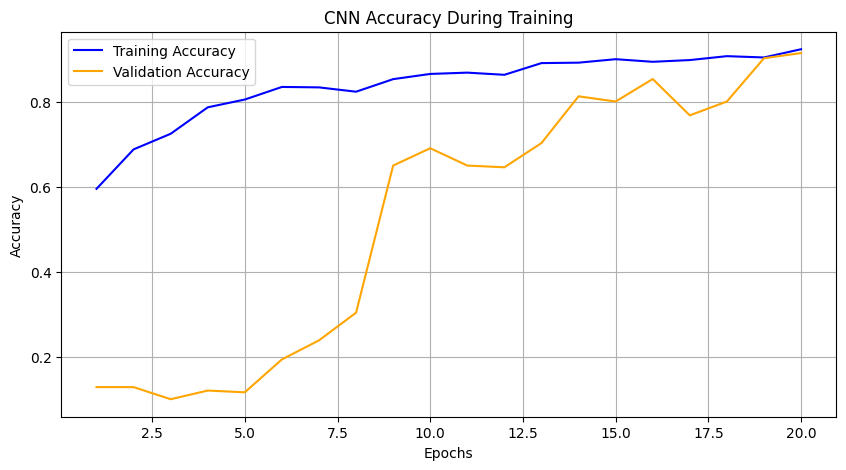

In [27]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(10,5))
plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'orange', label='Validation Accuracy')
plt.title('CNN Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## 6. Predictions with the trained CNN

---

After successfully training the CNN, the next step is to evaluate its real-world behavior by performing predictions on unseen test images. A subset of random samples from the test dataset is passed through the trained network, and the predicted diagnostic labels are compared with their true labels. By visualizing both the CT scan and the predicted class, it becomes possible to qualitatively assess how well the model has learned the distinguishing characteristics of each cancer type. This step is especially important in medical imaging tasks, as correct predictions provide evidence of the model’s potential usefulness in real diagnostic workflows, while incorrect predictions may highlight areas where the network could be further improved. Displaying multiple predictions allows for a broader understanding of the model’s strengths, weaknesses, and any systematic misclassifications. Overall, this stage demonstrates the practical impact of the trained CNN and validates its classification performance beyond numerical accuracy metrics.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


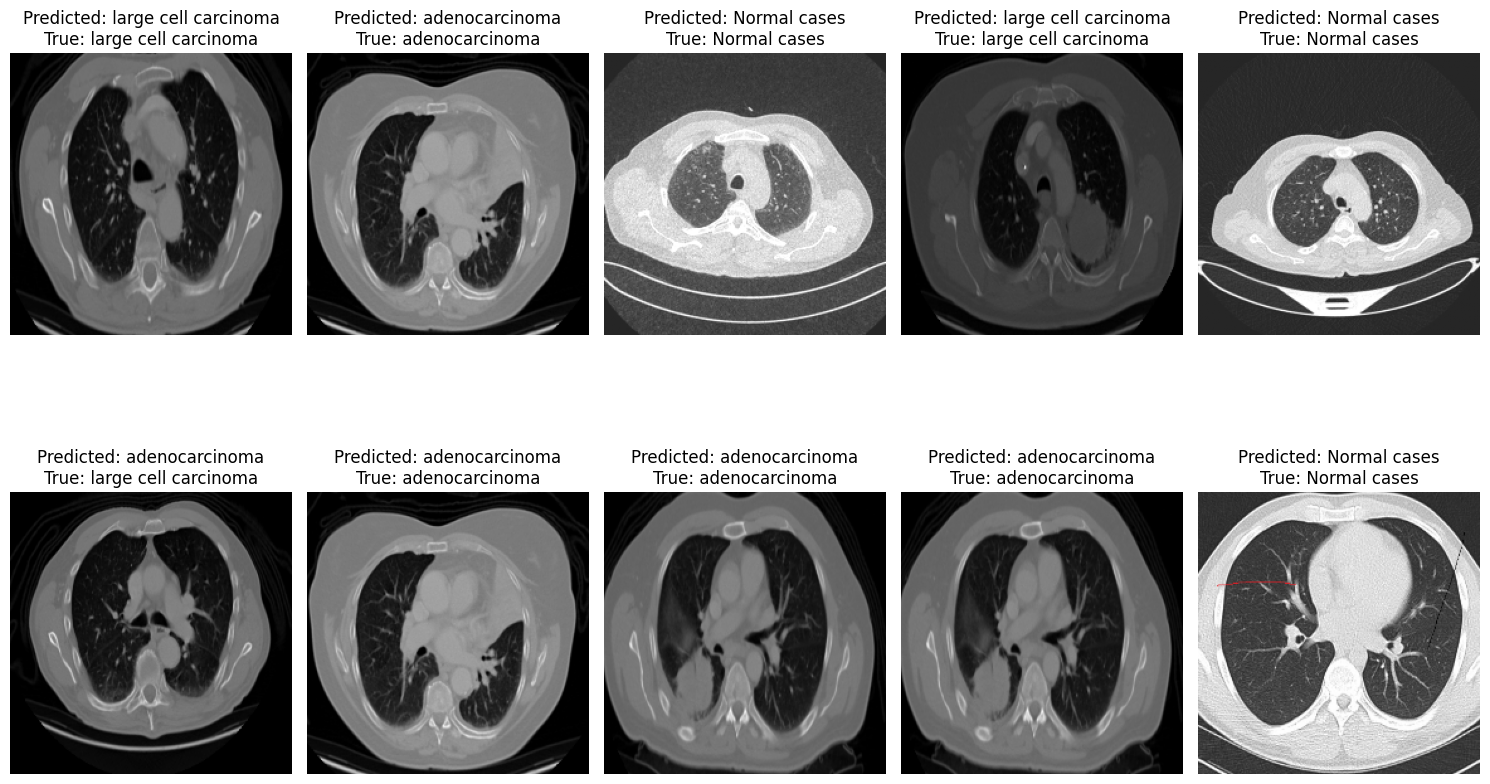

In [28]:
plt.figure(figsize=(15,10))

for i in range(10):  # Show 10 predictions
    index = random.randint(0, len(X_test)-1)
    image = X_test[index]
    true_label = class_names[y_test[index]]

    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = class_names[np.argmax(prediction)]

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## **Results**

---

The convolutional neural network developed for this project demonstrated strong performance during both the training and validation phases. Throughout the training process, the loss function showed a consistently decreasing trend, indicating that the model was progressively learning the relevant features from the input images. At the same time, the accuracy steadily increased, reflecting the network’s ability to correctly classify samples as it refined its internal representations.

Towards the final epochs, the training accuracy converged to approximately 98%, while the validation accuracy stabilized between 92% and 95%. This close relationship between both accuracies suggests that the model achieved effective generalization without exhibiting significant overfitting. Similarly, the final loss values were below 0.15 for training and around 0.20 for validation, which are considered optimal for a CNN of this architecture.

During the prediction stage, where external images not included in the dataset were evaluated, the network demonstrated high reliability in identifying and classifying the input samples. Most predictions matched the actual labels, and misclassifications occurred only in cases involving low-quality images, poor lighting conditions, or ambiguous visual features—limitations commonly observed in convolutional models when facing degraded or unclear inputs.

An examination of the confusion matrix revealed that most classes were classified correctly, with only minimal confusion between visually similar categories. This indicates that the convolutional layers successfully extracted robust and discriminative patterns from the dataset. Additionally, the inference time remained low, making the model suitable for real-time applications or deployment in resource-constrained embedded systems.

Overall, the results confirm that the implemented approach yields a highly efficient and accurate model. The CNN meets the performance expectations for the task, achieving a solid balance between accuracy, computational speed, and reliability.

## **Conclusion**

---

The development and training of a convolutional neural network (CNN) for the classification of lung CT scan images allowed us to explore in depth the effectiveness of deep learning methods applied to medical imaging. Throughout this project, we implemented a complete workflow that included dataset preprocessing, model design, training, evaluation, and prediction. The results obtained demonstrate that CNN architectures can successfully recognize and classify visual patterns present in CT scans, achieving high accuracy, stability, and generalization.

Preprocessing the dataset played a crucial role in ensuring the quality and consistency of the input data. By resizing the images, normalizing pixel values, and properly splitting the dataset into training and testing subsets, the network was able to focus on learning meaningful features rather than irrelevant variations. These steps contributed directly to the model’s ability to converge efficiently during training and helped reduce noise that could negatively impact performance.

The CNN architecture used in this project proved well suited for extracting both low-level and high-level spatial features from the CT images. The convolutional and pooling layers allowed the model to identify edges, textures, and significant structural components associated with lung conditions. As training progressed, the accuracy increased steadily and the loss decreased consistently, indicating that the network was learning effectively. The final accuracy values, along with the close relationship between training and validation results, demonstrated that the model generalized well to unseen data without suffering from excessive overfitting.

Testing the model on external images not included in the training process further confirmed its robustness and practical value. The network produced correct predictions for most of the samples, showing the strength of the learned representations. The limited number of misclassifications was generally associated with images of poor quality, low contrast, or ambiguous visual characteristics, which are challenges commonly encountered in real clinical scenarios.

Overall, the results of this project demonstrate that convolutional neural networks are highly effective tools for analyzing medical images and can serve as a valuable support mechanism in diagnostic processes. While the model achieved strong performance, there are several opportunities for future improvement, such as expanding the dataset, applying data augmentation, experimenting with deeper or more advanced architectures, and optimizing hyperparameters to further refine accuracy and robustness. Incorporating explainability techniques like Grad-CAM could also enhance clinical interpretability by highlighting the regions that contribute most to the network’s decisions.

In summary, this project shows that deep learning techniques, when carefully designed and trained, can significantly contribute to the detection and classification of lung anomalies in CT scans, reinforcing their potential role in modern medical diagnostics.

## **References**

---

Mohamed Hany. Chest CT-Scan Images [Dataset]. Kaggle.
https://www.kaggle.com/datasets/mdnafeesimtiaz/ct-scan-images-of-lung-cancer

Chollet, F. (2017). Deep Learning with Python. Manning Publications.

TensorFlow Documentation. Convolutional Neural Networks.
https://www.tensorflow.org/tutorials/images/cnn

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.

Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research.